# Data Mining - Assignment 1

---
> Konstantinos Alamanis, MSc in Business Analytics PT 2021-2022 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> p2822103@aueb.gr

In [81]:
# importing relevant packages
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

## 1. Data Cleaning & Exploration

In [82]:
# reading the data
data = pd.read_csv("./bank.csv", delimiter='\;', engine='python')
data.head(10)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Rating,Products
0,33.0,entrepreneur,married,secondary,no,2,yes,yes,poor,"1,3,16,17,19"
1,35.0,management,married,tertiary,no,231,yes,no,good,"4,8,16"
2,NaN,management,single,tertiary,no,447,yes,yes,fair,"7,16"
3,42.0,entrepreneur,divorced,tertiary,yes,2,yes,no,fair,"1,3,8,10,11,12,18,19"
4,58.0,retired,married,primary,no,121,yes,no,good,"4,5,6,7,11,18,19"
5,43.0,technician,single,secondary,no,593,yes,no,good,"1,5,7,8,11,16,17,19,20"
6,41.0,admin.,divorced,secondary,no,270,yes,no,good,"2,3,4,5,9,10,11,12,14,17"
7,29.0,admin.,single,secondary,no,390,yes,no,good,17
8,53.0,technician,married,secondary,no,6,yes,no,good,"8,13,14,16,17,18,19,20"
9,NaN,services,married,secondary,no,162,yes,no,good,3


In [83]:
# calculating means to fill missing age data
job_means = round(data.groupby('Job')['Age'].mean(),0)
job_means

Job
admin.           39.0
blue-collar      40.0
entrepreneur     42.0
housemaid        46.0
management       40.0
retired          62.0
self-employed    40.0
services         39.0
student          26.0
technician       39.0
unemployed       41.0
Name: Age, dtype: float64

In [84]:
# filling the null values in age columns
data.set_index('Job',inplace=True)
data_cl = data.copy()
data_cl['Age'] = data['Age'].fillna(job_means, axis='index')
data_cl.reset_index(inplace=True)
data_cl.head(10)

,Job,Age,Marital,Education,Default,Balance,Housing,Loan,Rating,Products
0,entrepreneur,33.0,married,secondary,no,2,yes,yes,poor,"1,3,16,17,19"
1,management,35.0,married,tertiary,no,231,yes,no,good,"4,8,16"
2,management,40.0,single,tertiary,no,447,yes,yes,fair,"7,16"
3,entrepreneur,42.0,divorced,tertiary,yes,2,yes,no,fair,"1,3,8,10,11,12,18,19"
4,retired,58.0,married,primary,no,121,yes,no,good,"4,5,6,7,11,18,19"
5,technician,43.0,single,secondary,no,593,yes,no,good,"1,5,7,8,11,16,17,19,20"
6,admin.,41.0,divorced,secondary,no,270,yes,no,good,"2,3,4,5,9,10,11,12,14,17"
7,admin.,29.0,single,secondary,no,390,yes,no,good,17
8,technician,53.0,married,secondary,no,6,yes,no,good,"8,13,14,16,17,18,19,20"
9,services,39.0,married,secondary,no,162,yes,no,good,3


## 2. Compute data (dis-)similarity

* A set of functions would be created in order to be used recurrently in the rest notebook.
* We have created almost one function per attribute.

### Ordinal Dissimilarities

* Depicting the ordinality range with numbers.

In [85]:
data_cl['RatingRank'] = data_cl['Rating'].replace({"poor":1, "fair":2, "good":3 ,"very_good" :4, "excelent":5})
data_cl['RatingRank'].value_counts()

3    20756
4    13889
2     7045
1     1066
5      435
Name: RatingRank, dtype: int64

In [86]:
data_cl['EduRank'] = data_cl['Education'].replace({"primary":1, "secondary":2, "tertiary":3})
data_cl['EduRank'].value_counts()

2    23130
3    13261
1     6800
Name: EduRank, dtype: int64

In [87]:
# function created for rating dissimilarities
def rating_dissimilarities(table_cl,i,y):
    dis = abs( (table_cl[i] - table_cl[y])  / 4 )
    return dis

In [88]:
# testing function 
rating_dis = rating_dissimilarities(data_cl['RatingRank'], 0, 1000)
rating_dis

0.5

In [89]:
# function created for education dissimilarities
def education_dissimilarities(table_cl,i,y):
    dis = abs( (table_cl[i] - table_cl[y])  / 2 )
    return dis

In [90]:
# testing function
education_dis = education_dissimilarities(data_cl['EduRank'], 10, 65)
education_dis

0.5

### Nominal Dissimilarities

In [91]:
# function created for nominal dissimilarities
def nominal_dissimilarities(table_cl,i,y):
    if table_cl[i]==table_cl[y]:
        dis = 0
    else:
        dis = 1
    return dis

### Numerical Dissimilarities

In [92]:
# function created for balance dissimilarity
def balance_dissimilarities(table_cl,i,y):
    val = abs( table_cl[i] - table_cl[y] ) / ( 102127 - (-8019) )
    return round(val,5)

In [93]:
# testing function
balance_dissimilarities(data_cl['Balance'],100,3)

0.00033

In [94]:
# function created for age dissimilarity
def age_dissimilarities(table_cl,i,y):
    val = abs( table_cl[i] - table_cl[y] ) / ( 95 - 18 )
    return round(val,5)

In [95]:
# testing function
age_dissimilarities(data_cl['Age'],200,30000)

0.1039

### Products Set Dissimilarities

In [96]:
# jaccard similarity for products sets
def jaccard_sim(table_cl,i,y):
    intersect = len(set(table_cl[i].split(',')).intersection(table_cl[y].split(',')))
    union = (len(table_cl[i].split(',')) + len(table_cl[y].split(','))) - intersect
    return round((float(intersect) / union),5)

In [97]:
# testing function
jaccard_sim(data_cl["Products"],300,4000)

0.09091

## 3. Nearest Neighbor (NN) search

* The loop below utilize all created functions for dissimilarities, calculates total similarity and keep the top 10 nearest neighbors.
* Itterates for the given 10 customers and finding their most similar customers across the enitire dataset.
* The time needed for the loop is ~8,5mins but for the convenience of the reader, the results have been exported and loaded again.

In [98]:
customers = [1200, 3650, 10400, 14930, 22330, 25671, 29311, 34650, 39200, 42000]
df_nn_final = pd.DataFrame(columns=['CustomerID1','CustomerID2','Similarity'])
for i in customers:
     sim_mtrx = pd.DataFrame(columns=['CustomerID1','CustomerID2','Similarity'])     
     for y in tqdm(data_cl.index):
          if y==i:
               continue
          # ordinals
          rr = rating_dissimilarities(data_cl['RatingRank'], i, y)
          er = education_dissimilarities(data_cl['EduRank'], i, y)
          # nominals
          jb = nominal_dissimilarities(data_cl['Job'], i, y)
          mr = nominal_dissimilarities(data_cl['Marital'], i, y)
          df = nominal_dissimilarities(data_cl['Default'], i, y)
          hs = nominal_dissimilarities(data_cl['Housing'], i, y)
          ln = nominal_dissimilarities(data_cl['Loan'], i, y)
          # products set
          prd = 1 - jaccard_sim(data_cl['Products'], i, y)
          # numerical
          ag = age_dissimilarities(data_cl['Age'], i, y)
          bal = balance_dissimilarities(data_cl['Balance'], i, y)
          # aggregation
          ttl = (1 - ((rr+er+jb+mr+df+hs+ln+prd+ag+bal)/10))
          res = {"CustomerID1" : i, "CustomerID2": y, "Similarity": ttl}
          df_res = pd.DataFrame([res])
          # appending the result of y itteration
          sim_mtrx = pd.concat([sim_mtrx, df_res], axis=0)
     # for all the customers, keeping to the final dataframe only top 10 nearest neighbors
     df_nn_final = pd.concat([df_nn_final, sim_mtrx.nlargest(10, 'Similarity')], axis=0)

100%|██████████| 43191/43191 [00:57<00:00, 753.11it/s]


In [99]:
#df_nn_final.to_csv("./top10nn.csv")

* If you have prefered not to run the loop, run the below cell to load the results.

In [100]:
df_nn_final = pd.read_csv("./top10nn.csv", delimiter=',', index_col=0)
display(df_nn_final.head())
display(df_nn_final.tail())

,CustomerID1,CustomerID2,Similarity
0,1200,24897,0.939524
0,1200,7448,0.934714
0,1200,1660,0.933976
0,1200,14912,0.932751
0,1200,34503,0.932026


,CustomerID1,CustomerID2,Similarity
0,42000,29886,0.947494
0,42000,32523,0.946310
0,42000,29573,0.946236
0,42000,8078,0.945127
0,42000,32895,0.944703


* There are 2 options to display the results:
    * Either use the below function to input a specific customer and see the 10NN.
    * Or run the loop after the function to display the results for all 10 customers.

In [101]:
# function to display the 10NN after input CustomerID (e.g., "1200")
def nearest_neighbor(df):
    cust_id = int(input('Provide a CustomerID '))
    display_res = df[df['CustomerID1']==cust_id]
    style1 = [dict(selector='caption', props=[("font-size",'100%'), ("font-weight", 'bold')])]
    return display_res[['CustomerID2', 'Similarity']].reset_index(drop=True).style.set_caption("10 NN for CustomerID %i" % cust_id).set_table_styles(style1)

In [102]:
nearest_neighbor(df_nn_final)

In [103]:
# loop to print the results for all 10 customers
for i in df_nn_final['CustomerID1'].unique() : 
    display_res = df_nn_final[df_nn_final['CustomerID1']==i]
    style1 = [dict(selector='caption', props=[("font-size",'100%'), ("font-weight", 'bold')])]
    display(display_res[['CustomerID2', 'Similarity']].reset_index(drop=True).style.set_caption("10 NN for CustomerID %i" % i).set_table_styles(style1))
    

,CustomerID2,Similarity
0,24897,0.939524
1,7448,0.934714
2,1660,0.933976
3,14912,0.932751
4,34503,0.932026
5,7034,0.930920
6,13730,0.930823
7,36452,0.930695
8,8604,0.929582
9,313,0.929524


,CustomerID2,Similarity
0,5964,0.965507
1,8783,0.949264
2,26915,0.945718
3,4472,0.944699
4,36416,0.943460
5,30584,0.942830
6,33540,0.941803
7,16558,0.941172
8,25016,0.939029
9,24799,0.932145


,CustomerID2,Similarity
0,42394,0.944499
1,19547,0.940211
2,34689,0.939046
3,9331,0.939018
4,27072,0.933332
5,17420,0.931766
6,20404,0.927662
7,20525,0.924995
8,22547,0.924415
9,41843,0.923687


,CustomerID2,Similarity
0,17418,0.915155
1,7583,0.910702
2,11778,0.905634
3,16439,0.903467
4,12628,0.901016
5,15797,0.900259
6,29092,0.900243
7,13072,0.899564
8,10729,0.896629
9,10890,0.894088


,CustomerID2,Similarity
0,15717,0.990623
1,16042,0.952412
2,30118,0.941330
3,23250,0.910487
4,16406,0.910218
5,23394,0.909910
6,15058,0.907690
7,14698,0.905428
8,4884,0.903394
9,13285,0.901809


,CustomerID2,Similarity
0,21113,0.938746
1,40717,0.937843
2,23602,0.937643
3,27373,0.935806
4,19547,0.931257
5,32030,0.930599
6,11102,0.929453
7,23519,0.928209
8,9606,0.928197
9,41282,0.928031


,CustomerID2,Similarity
0,4542,0.930732
1,234,0.928659
2,26497,0.926302
3,6596,0.923633
4,28454,0.921609
5,7929,0.917710
6,34959,0.914729
7,7053,0.913704
8,33851,0.913663
9,35247,0.913059


,CustomerID2,Similarity
0,2258,0.937151
1,32087,0.936725
2,24793,0.934759
3,35282,0.931501
4,8462,0.929016
5,34618,0.926878
6,1351,0.926502
7,2968,0.925512
8,652,0.924749
9,8169,0.924373


,CustomerID2,Similarity
0,39233,0.949668
1,40086,0.947991
2,41662,0.946898
3,40901,0.946624
4,32422,0.945982
5,41136,0.944036
6,38913,0.940832
7,29726,0.940148
8,27681,0.938957
9,39631,0.938567


,CustomerID2,Similarity
0,39897,0.965649
1,27907,0.955727
2,26435,0.954478
3,26216,0.953809
4,40642,0.948753
5,29886,0.947494
6,32523,0.946310
7,29573,0.946236
8,8078,0.945127
9,32895,0.944703


## 4. Customer rating prediction

* The loop below utilize all created functions for dissimilarities, calculates total similarity and keep the top 10 nearest neighbors by excluding "Rating".
* Itterates for the first 50 customers, finding their most similar customers across the enitire dataset.
* After the detection of NN10, it predicts the Customer Rating Ranking based on Average rating of NN10 and the Weighted Average based also on NN10 and the respective similarity values.
* The time needed for the loop is ~42mins but for the convenience of the reader, the results have been exported and loaded again.

In [104]:
df_nn_final2 = pd.DataFrame(columns=['CustomerID1','CustomerID2','Similarity'])
for i in range(0,50):
     sim_mtrx2 = pd.DataFrame(columns=['CustomerID1','CustomerID2','Similarity'])     
     for y in tqdm(data_cl.index):
          if y==i:
               continue
          #ordinals
          #rr = rating_dissimilarities(data_cl['RatingRank'], i, y)
          er = education_dissimilarities(data_cl['EduRank'], i, y)
          #nominals
          jb = nominal_dissimilarities(data_cl['Job'], i, y)
          mr = nominal_dissimilarities(data_cl['Marital'], i, y)
          df = nominal_dissimilarities(data_cl['Default'], i, y)
          hs = nominal_dissimilarities(data_cl['Housing'], i, y)
          ln = nominal_dissimilarities(data_cl['Loan'], i, y)
          #products set
          prd = 1 - jaccard_sim(data_cl['Products'], i, y)
          #numerical
          ag = age_dissimilarities(data_cl['Age'], i, y)
          bal = balance_dissimilarities(data_cl['Balance'], i, y)
          #aggregation
          ttl = (1 - ((er+jb+mr+df+hs+ln+prd+ag+bal)/9))
          res = {"CustomerID1" : i, "CustomerID2": y, "Similarity": ttl}
          df_res2 = pd.DataFrame([res])
          # appending the result of y itteration
          sim_mtrx2 = pd.concat([sim_mtrx2, df_res2], axis=0)
     # for all the customers, keeping to the final dataframe only top 10 nearest neighbors
     df_nn_final2 = pd.concat([df_nn_final2, sim_mtrx2.nlargest(10, 'Similarity')], axis=0)
# finding the rating of NN10 and make the predictions
df_prediction = pd.merge(df_nn_final2, data_cl['RatingRank'], how='left', left_on="CustomerID2", right_on=data_cl.index)
df_prediction_final = df_prediction.groupby('CustomerID1')[['RatingRank']].mean().round(0)
df_prediction_final['WeightedAvg'] = df_prediction.groupby('CustomerID1').apply(lambda x: np.average(x.RatingRank, weights=x.Similarity)).round(0)

100%|██████████| 43191/43191 [00:47<00:00, 911.78it/s] 


In [105]:
#df_prediction_final.to_csv("./predictions_final.csv")

* If you have prefered not to run the loop, run the below cell to load the results.

In [106]:
df_prediction_final = pd.read_csv("./predictions_final.csv")
df_prediction_final

,CustomerID1,RatingRank,WeightedAvg
0,0,2.0,1.0
1,1,3.0,3.0
2,2,2.0,2.0
3,3,2.0,2.0
4,4,3.0,3.0
5,5,3.0,3.0
6,6,3.0,3.0
7,7,3.0,3.0
8,8,3.0,3.0
9,9,3.0,3.0


In [107]:
# merging predictions with actual ratings
df_prediction_final_v2 = pd.merge(df_prediction_final, data_cl['RatingRank'], how='left', left_on='CustomerID1', right_on=data_cl.index, suffixes=["_prd", "_act"])
df_prediction_final_v2.head()

,CustomerID1,RatingRank_prd,WeightedAvg,RatingRank_act
0,0,2.0,1.0,1
1,1,3.0,3.0,3
2,2,2.0,2.0,2
3,3,2.0,2.0,2
4,4,3.0,3.0,3


In [108]:
PredictedRanking_MAE = mean_absolute_error(df_prediction_final_v2['RatingRank_act'], df_prediction_final_v2['RatingRank_prd'])
WeightedRanking_MAE = mean_absolute_error(df_prediction_final_v2['RatingRank_act'], df_prediction_final_v2['WeightedAvg'])


Predicted Ranking MAE: 0.34
Predicted Weighted Ranking MAE: 0.34


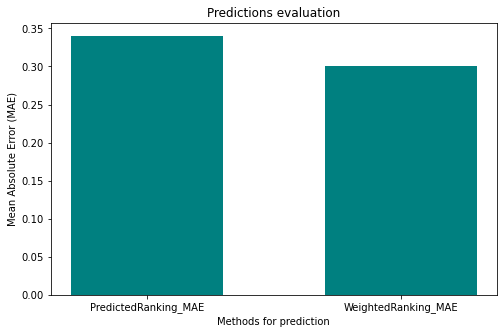

In [139]:
data = {'PredictedRanking_MAE':PredictedRanking_MAE, 'WeightedRanking_MAE':WeightedRanking_MAE}
methods = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (8, 5))

# creating the bar plot
plt.bar(methods, values, color ='teal', width = 0.6)
plt.xlabel("Methods for prediction")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Predictions evaluation")
print("Predicted Ranking MAE: " + PredictedRanking_MAE.astype(str))
print("Predicted Weighted Ranking MAE: " + PredictedRanking_MAE.astype(str))
plt.show()